In [80]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline

## Get only json

In [19]:
path_one = '/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/data_one'
path_two = '/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/data_two'

In [20]:
# path to files
def getsubs(dir):
    dirs = []
    files = []
    for dirname, dirnames, filenames in os.walk(dir):
        dirs.append(dirname)
        for subdirname in dirnames:
            dirs.append(os.path.join(dirname, subdirname))
        for filename in filenames:
            (mode, ino, dev, nlink, uid, gid, size, atime, mtime, ctime) = os.stat(dirname + "/" + filename)
            files.append(os.path.join(dirname, filename))

    return files

In [21]:
list_data_one = getsubs(path_one)
list_data_two = getsubs(path_two)

In [22]:
len(list_data_one)

3264

In [23]:
len(list_data_two)

3229

In [24]:
data_json1 = list()
data_json2 = list()
def json_files(path_list, data_list):
    for strok in path_list:
        if strok.endswith('.json'):
            data_list.append(strok)
    return data_list

In [25]:
data_json1 = json_files(list_data_one, data_json1)

In [26]:
data_json2 = json_files(list_data_two, data_json2)

In [27]:
len(data_json1)

1086

In [28]:
len(data_json2)

1074

## random list equation

In [29]:
import random

In [30]:
a = list()
for i in range(len(data_json1)):
    n = round(random.random()*len(data_json2))
    a.append(n)
#print("A =", a)

In [31]:
new_list = list()
data_json2eq = list()

In [32]:
def equation(data_list, index_list, new_list):
    for i in index_list:
        new_list.append(data_list[i])
    return new_list

In [33]:
data_json2eq = equation(data_json2, a, new_list)

In [34]:
len(data_json2eq)

1086

## Create TXT files wthis parametrs

In [35]:
path = path_one
color1 = open(path + '/color.txt', 'w')
color1.writelines('color' + '\n')
accentColor1 = open(path + '/accentColor.txt', 'w')
accentColor1.writelines('accentColor' + '\n')
tags1 = open(path + '/a_tags.txt', 'w')
tags1.writelines('tags' + '\n')
description1 = open(path + '/description.txt', 'w')
description1.writelines('description' + '\n')
captions1 = open(path + '/captions.txt', 'w')
captions1.writelines('captions' + '\n')
objects1 = open(path + '/objects.txt', 'w')
objects1.writelines('objects' + '\n')

In [36]:
path = path_two
color2 = open(path + '/color.txt', 'w')
color2.writelines('color' + '\n')
accentColor2 = open(path + '/accentColor.txt', 'w')
accentColor2.writelines('accentColor' + '\n')
tags2 = open(path + '/a_tags.txt', 'w')
tags2.writelines('tags' + '\n')
description2 = open(path + '/description.txt', 'w')
description2.writelines('description' + '\n')
captions2 = open(path + '/captions.txt', 'w')
captions2.writelines('captions' + '\n')
objects2 = open(path + '/objects.txt', 'w')
objects2.writelines('objects' + '\n')

In [37]:
def data_collection(list_files, color, accentColor, tags, description, captions):
    for pth in list_files:
        with open(pth) as json_file:
            data = json.load(json_file)
        #color
        for i in data['color']['dominantColors']:
                color.writelines(i + '\n')
        #accentColor  
        accentColor.writelines(data['color']['accentColor'] + '\n')
        #tags
           
        for i in data['tags']:
            tags.writelines(i['name'] + '\n')
        #description
            
        for i in data['description']['tags']:
            description.writelines(i + '\n')
        #captions

        for i in data["description"]["captions"]:
            captions.writelines(i["text"] + '\n')

In [38]:
# if len(data_json1) == len(data_json2eq):
#     print('ok')

In [39]:
data_collection(data_json1, color1, accentColor1, tags1, description1, captions1)

In [40]:
data_collection(data_json2, color2, accentColor2, tags2, description2, captions2)
# data_collection(data_json2eq, color2, accentColor2, tags2, description2, captions2)

In [41]:
color1.close()
accentColor1.close()
tags1.close()
description1.close()
captions1.close()

color2.close()
accentColor2.close()
tags2.close()
description2.close()
captions2.close()

## Captions

In [42]:
df_captions1 = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/data_one/captions.txt')
df_captions2 = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/data_two/captions.txt')

In [43]:
df_captions1['count'] = 1
df_captions2['count'] = 1

In [44]:
df1_count_u1 = pd.value_counts(df_captions1['captions'].values.ravel()) 
df1_count_u2 = pd.value_counts(df_captions2['captions'].values.ravel()) 

In [45]:
captions1 = df1_count_u1.to_frame(name="tula") #tula
captions2 = df1_count_u2.to_frame(name="tver") #tver

In [46]:
captions1.head(3)

,tula
a sign on the side of a road,300
a car parked on the side of a road,78
a view of the side of a road,51


In [47]:
captions2.head(3)

,tver
a sign on the side of a road,385
a car parked on the side of a road,69
a close up of a road,56


In [48]:
result = pd.concat([captions1, captions2], axis=1, sort=False)

In [49]:
result.to_csv('Captions.csv')

## Tags

In [50]:
df_a_tags1 = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/data_one/a_tags.txt')
df_a_tags2 = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/data_two/a_tags.txt')

In [51]:
df_a_tags1['count'] = 1
df_a_tags2['count'] = 1

In [52]:
df_tags_u1 = pd.value_counts(df_a_tags1['tags'].values.ravel()) 
df_tags_u2 = pd.value_counts(df_a_tags2['tags'].values.ravel()) 

In [53]:
df1 = df_tags_u1.to_frame(name="tula")
df2 = df_tags_u2.to_frame(name="tver")

In [54]:
result_t = pd.concat([df1, df2], axis=1, sort=False)

In [55]:
result_t.to_csv('Tags.csv')

## Descriptions

In [56]:
df_dskrpt1 = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/data_one/description.txt')
df_dskrpt2 = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/data_two/description.txt')

In [57]:
df_dskr_u1 = pd.value_counts(df_dskrpt1['description'].values.ravel()) 
df_dskr_u2 = pd.value_counts(df_dskrpt2['description'].values.ravel()) 

In [58]:
df1 = df_dskr_u1.to_frame(name="tula")
df2 = df_dskr_u2.to_frame(name="tver")

In [59]:
result_d = pd.concat([df1, df2], axis=1, sort=False)

In [60]:
result_d.to_csv('Descriptions.csv')

## Color

In [61]:
df_color1 = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/data_one/color.txt')
df_color2 = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/data_two/color.txt')

In [62]:
df_clr_u1 = pd.value_counts(df_color1['color'].values.ravel()) 
df_clr_u2 = pd.value_counts(df_color2['color'].values.ravel()) 

In [63]:
df1 = df_clr_u1.to_frame(name="tula")
df2 = df_clr_u2.to_frame(name="tver")

In [64]:
result_c = pd.concat([df1, df2], axis=1, sort=False)

In [65]:
result_c.to_csv('Color.csv')

## AccentColor

In [66]:
df_acolor1 = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/data_one/accentColor.txt')
df_acolor2 = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/data_two/accentColor.txt')

In [67]:
df_aclr_u1 = pd.value_counts(df_acolor1['accentColor'].values.ravel()) 
df_aclr_u2 = pd.value_counts(df_acolor2['accentColor'].values.ravel()) 

In [68]:
df1 = df_aclr_u1.to_frame(name="tula")
df2 = df_aclr_u2.to_frame(name="tver")

In [69]:
result_ac = pd.concat([df1, df2], axis=1, sort=False)

In [70]:
result_ac.to_csv('AccentColor.csv')

## Select categories (do)

In [81]:
# dodododoodododododododododododododo

## Vizualization result

In [82]:
dfv = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/result_analisys/TulaTverCategory.txt')

In [83]:
dfv

,Tula,Tver,Category
0,701,649,Благоустройство
1,639,587,Природа
2,1018,1087,Транспортная инфраструктура
3,464,529,Трафик
4,56,77,Велосипед
5,205,152,Город - застройка
6,23,13,Грязь
7,2135,2158,Прочие объекты и определения обнаруженные в го...
8,4546,4588,Всего обнаружено тегов


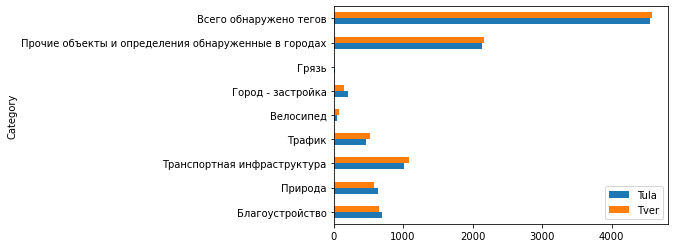

In [84]:
dfv.plot(kind = 'barh', x = 'Category')

In [105]:
for index, row in dfv.iterrows():
    print(row['Category'])

Благоустройство
Природа
Транспортная инфраструктура
Трафик
Велосипед
Город - застройка
Грязь
Прочие объекты и определения обнаруженные в городах
Всего обнаружено тегов


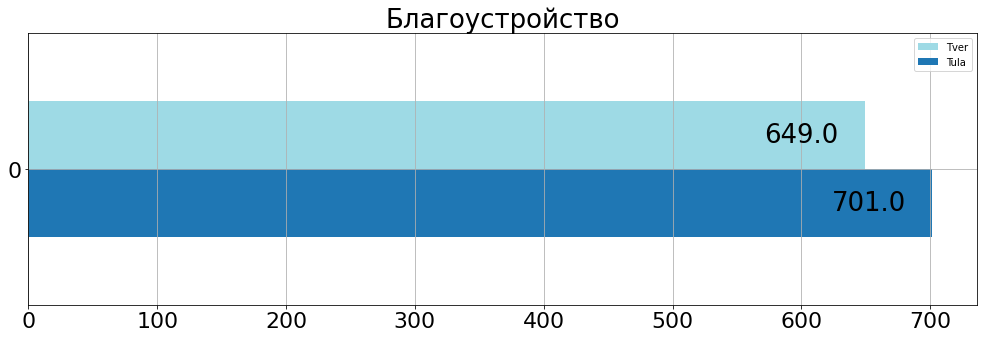

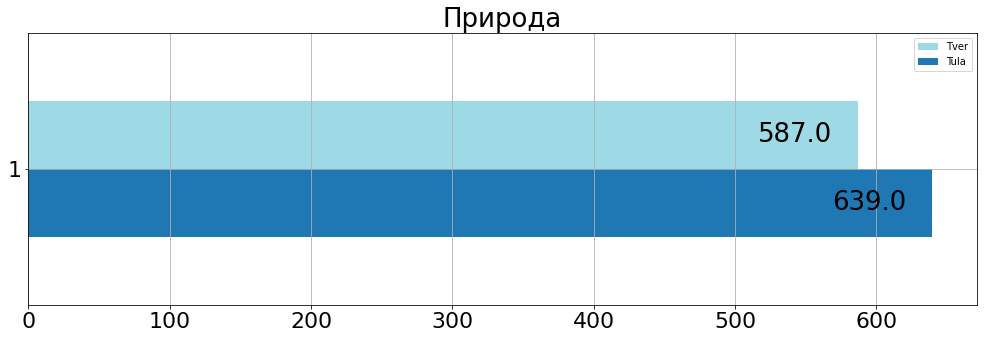

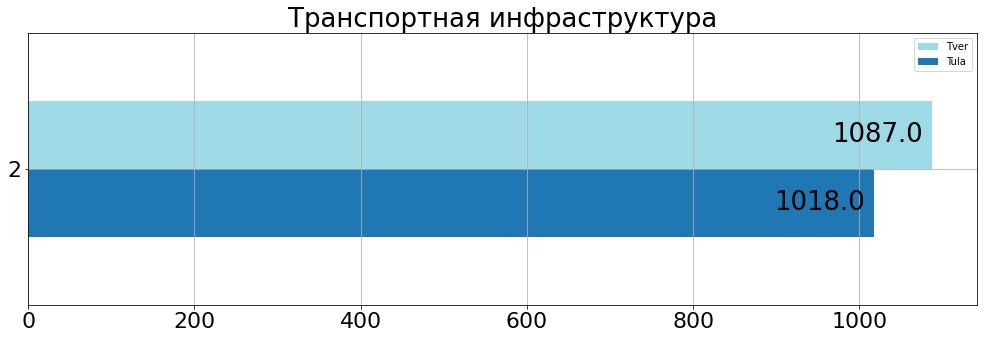

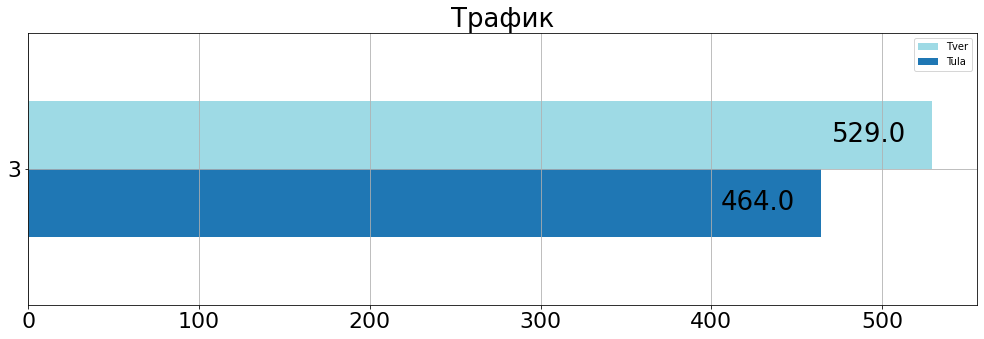

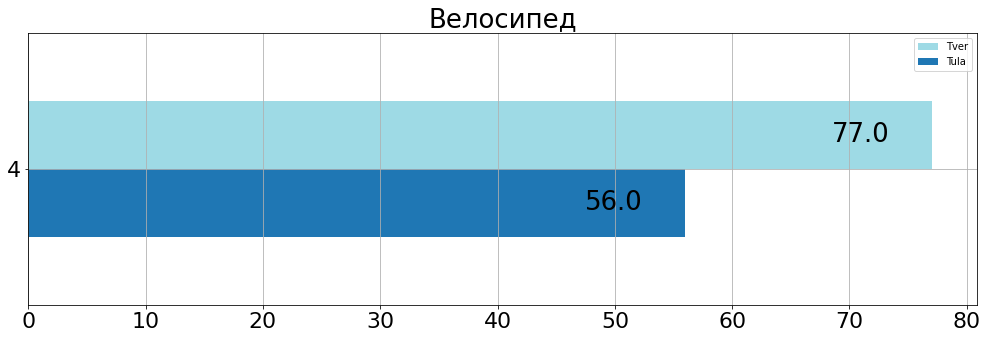

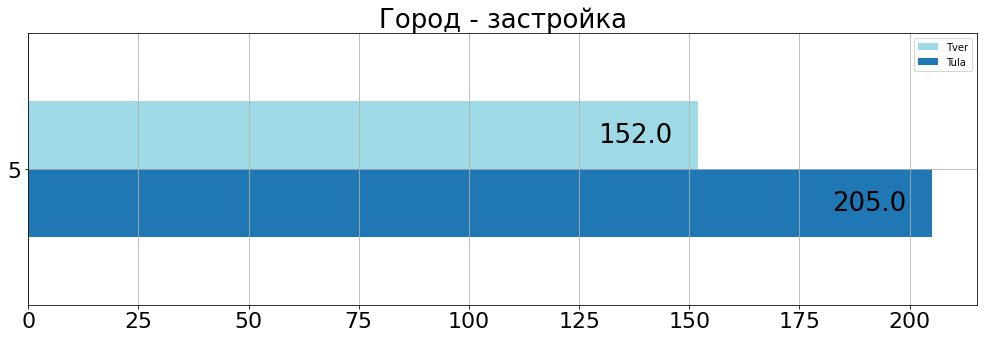

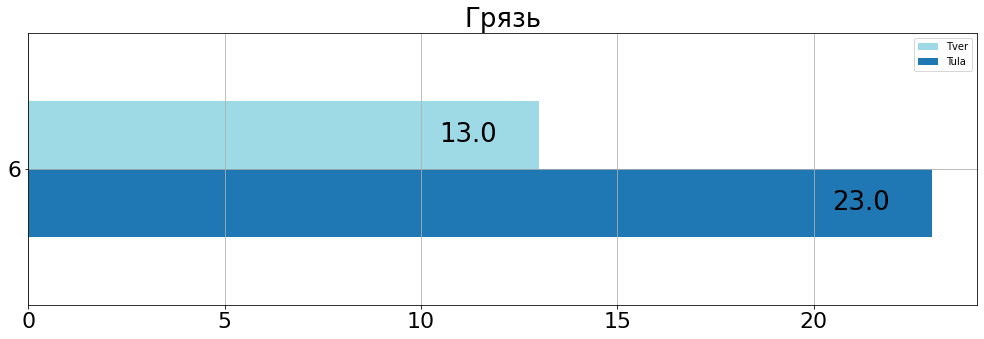

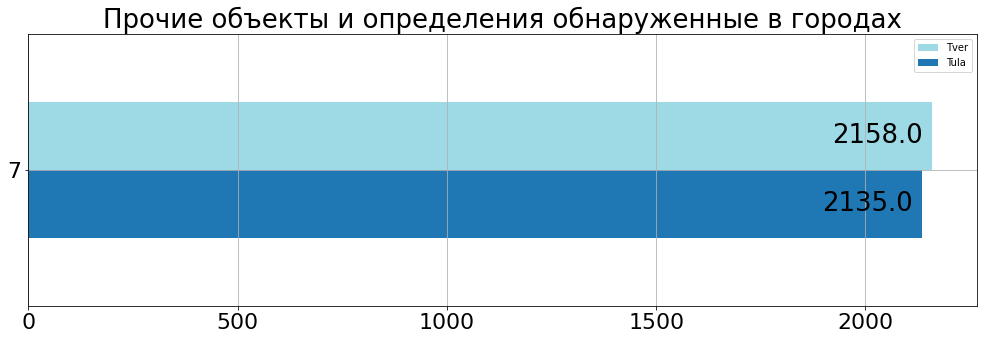

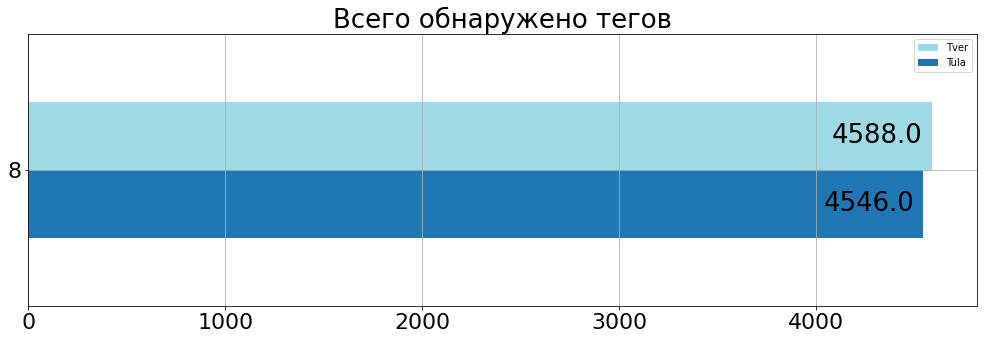

In [108]:
## Clean code
for index, row in dfv.iterrows():
    ax = row.to_frame().T.plot(kind = 'barh', colormap = 'tab20',figsize = (17,5),fontsize = 22, grid = True, legend = 'reverse')#, title = str(row.to_frame().T['Category']))#, x = 'Category'
    rects = ax.patches
    fontdict = {'fontsize': 26}
    plt.title(row['Category'], fontdict=fontdict)
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = -100
        # Vertical alignment for positive values
        ha = 'left'

#         # If value of bar is negative: Place label left of bar
#         if x_value < 0:
#             # Invert space to place label to the left
#             space *= -1
#             # Horizontally align label at right
#             ha = 'right'

        # Use X value as label and format number with one decimal place
        label = "{:.1f}".format(x_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha,                      # Horizontally align label differently for
            fontsize = 26)                      
                                        # positive and negative values.
    
    plt.savefig(str(row.to_frame().T['Category']) + "image.png")

## Treemap

In [86]:
import squarify

In [87]:
clr_tula = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/result_analisys/viz/clr_tula.csv')

In [88]:
clr_tver = pd.read_csv('/Users/denis.murataev/Jyputer_notebooks/comparative_analysis_of_cities/result_analisys/viz/clr_tver.csv')

In [89]:
clr_tula.head()

,color,tula
0,#515930,6
1,#505930,5
2,#505938,5
3,#515934,5
4,#505934,5


In [90]:
clr_tver.head()

,Colors,tver
0,#505930,7
1,#505938,7
2,#515934,5
3,#51573A,4
4,#50593D,4


## Tula

In [109]:
sizes_tula = clr_tula['tula']

In [110]:
color_tula = clr_tula['color']

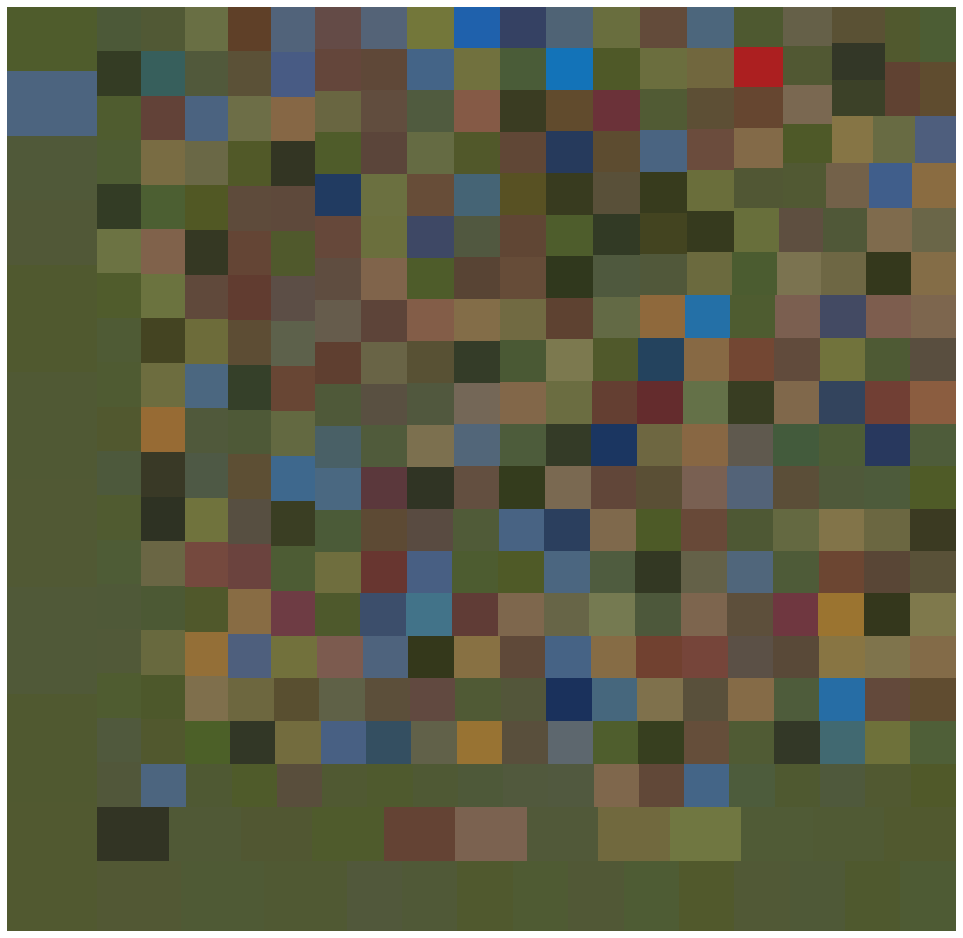

In [111]:
fig, ax = plt.subplots(1, figsize = (17,17))
squarify.plot(sizes=sizes_tula, color=color_tula, alpha=1, )
plt.axis('off')
plt.savefig("treemap_color_tula.png")
plt.show()


## Tver

In [112]:
sizes_tver = clr_tver['tver']

In [113]:
color_tver = clr_tver['Colors']

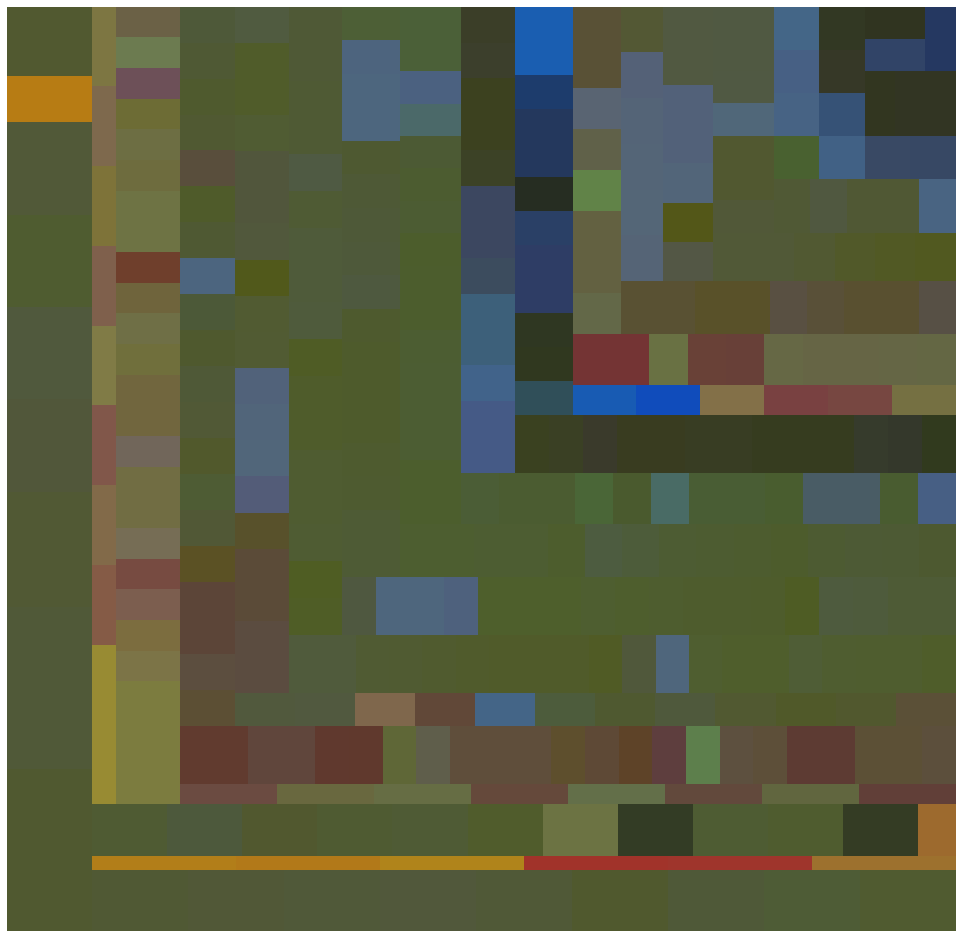

In [114]:
fig, ax = plt.subplots(1, figsize = (17,17))
squarify.plot(sizes=sizes_tver, color=color_tver, alpha=1, )
plt.axis('off')
plt.savefig("treemap_color_tver.png")
plt.show()


## In matplotlib

In [ ]:
# https://habr.com/ru/post/468295/

In [1]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
%matplotlib inline
import joypy

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

ModuleNotFoundError: No module named 'joypy'

In [75]:
# Read data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
group_col = 'Gender'
order_of_bars = df.Stage.unique()[::-1]
colors = [plt.cm.Spectral(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

for c, group in zip(colors, df[group_col].unique()):
    sns.barplot(x='Users', y='Stage', data=df.loc[df[group_col]==group, :], order=order_of_bars, color=c, label=group)

# Decorations    
plt.xlabel("$Users$")
plt.ylabel("Stage of Purchase")
plt.yticks(fontsize=12)
plt.title("Population Pyramid of the Marketing Funnel", fontsize=22)
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# !pip install joypy
# Import Data
mpg = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

In [ ]:
dfv.head()

In [ ]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(dfv, column=['Tula', 'Tver'], by="Category", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()